# Business License Status Prediction

## Our goal is to perform a multi-class classification of the business license status of various users, from the given dataset.

### Importing libraries

In [661]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importing the datasets

In [662]:
# Importing the dataset
train_data = pd.read_csv("train_file.csv")
train_data.head()

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [664]:
# Importing the dataset
test_data = pd.read_csv("test_file.csv")
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [668]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [670]:
my_submission.shape

(57239, 1)

In [671]:
train_data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype='object')

In [672]:
# Studying the target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

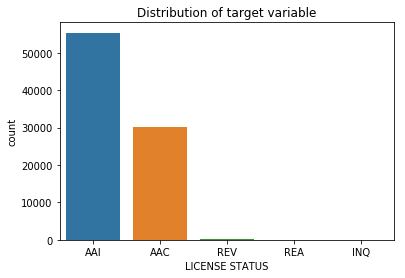

In [673]:
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

## Data Preprocessing

In [675]:
# Dropping columns which will be of no use for our model

train_data = train_data.drop(['LICENSE ID'], axis = 1)
test_data = test_data.drop(['LICENSE ID'], axis = 1)

train_data = train_data.drop(['ID'], axis = 1)
test_data = test_data.drop(['ID'], axis = 1)

train_data = train_data.drop(['ADDRESS'], axis = 1)
test_data = test_data.drop(['ADDRESS'], axis = 1)

train_data = train_data.drop(['STATE'], axis = 1)
test_data = test_data.drop(['STATE'], axis = 1)

train_data = train_data.drop(['LICENSE NUMBER'], axis = 1)
test_data = test_data.drop(['LICENSE NUMBER'], axis = 1)

train_data = train_data.drop(['APPLICATION CREATED DATE'], axis = 1)
test_data = test_data.drop(['APPLICATION CREATED DATE'], axis = 1)

train_data = train_data.drop(['LOCATION'], axis = 1)
test_data = test_data.drop(['LOCATION'], axis = 1)

train_data = train_data.drop(['LICENSE STATUS CHANGE DATE'], axis = 1)
test_data = test_data.drop(['LICENSE STATUS CHANGE DATE'], axis = 1)

train_data = train_data.drop(['WARD PRECINCT'], axis = 1)
test_data = test_data.drop(['WARD PRECINCT'], axis = 1)

# train_data = train_data.drop(['LATITUDE'], axis = 1)
# test_data = test_data.drop(['LATITUDE'], axis = 1)

# train_data = train_data.drop(['LONGITUDE'], axis = 1)
# test_data = test_data.drop(['LONGITUDE'], axis = 1)

In [679]:
train_data = train_data.dropna(thresh = 16)

In [680]:
train_data['LICENSE STATUS'].value_counts()

AAI    55163
AAC    29937
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [681]:
train_data['PAYMENT DATE'] = pd.to_datetime(train_data['PAYMENT DATE'])
train_data['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(train_data['APPLICATION REQUIREMENTS COMPLETE'])
train_data['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(train_data['LICENSE TERM EXPIRATION DATE'])
train_data['LICENSE TERM START DATE'] = pd.to_datetime(train_data['LICENSE TERM START DATE'])
train_data['DATE ISSUED'] = pd.to_datetime(train_data['DATE ISSUED'])
train_data['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(train_data['LICENSE APPROVED FOR ISSUANCE'])

In [682]:
test_data['PAYMENT DATE'] = pd.to_datetime(test_data['PAYMENT DATE'])
test_data['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(test_data['APPLICATION REQUIREMENTS COMPLETE'])
test_data['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(test_data['LICENSE TERM EXPIRATION DATE'])
test_data['LICENSE TERM START DATE'] = pd.to_datetime(test_data['LICENSE TERM START DATE'])
test_data['DATE ISSUED'] = pd.to_datetime(test_data['DATE ISSUED'])
test_data['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(test_data['LICENSE APPROVED FOR ISSUANCE'])

In [683]:
train_data['LATITUDE'] = train_data['LATITUDE'].fillna(train_data['LATITUDE'].mean())
test_data['LATITUDE'] = test_data['LATITUDE'].fillna(test_data['LATITUDE'].mean())
train_data['LONGITUDE'] = train_data['LONGITUDE'].fillna(train_data['LONGITUDE'].mean())
test_data['LONGITUDE'] = test_data['LONGITUDE'].fillna(test_data['LONGITUDE'].mean())

In [684]:
train_data['PAYMENT YEAR'] = train_data['PAYMENT DATE'].apply(lambda x: x.year)
train_data['PAYMENT MONTH'] = train_data['PAYMENT DATE'].apply(lambda x: x.month)

In [685]:
test_data['PAYMENT YEAR'] = test_data['PAYMENT DATE'].apply(lambda x: x.year)
test_data['PAYMENT MONTH'] = test_data['PAYMENT DATE'].apply(lambda x: x.month)

In [686]:
train_data = train_data.drop(['PAYMENT DATE'], axis = 1)

In [687]:
test_data = test_data.drop(['PAYMENT DATE'], axis = 1)

In [688]:
train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = train_data['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)

In [689]:
test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = test_data['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)

In [690]:
train_data = train_data.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)

In [691]:
test_data = test_data.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)

In [692]:
train_data['DATE ISSUED YEAR'] = train_data['DATE ISSUED'].apply(lambda x: x.year)

In [693]:
test_data['DATE ISSUED YEAR'] = test_data['DATE ISSUED'].apply(lambda x: x.year)

In [694]:
train_data = train_data.drop(['DATE ISSUED'], axis = 1)

In [695]:
test_data = test_data.drop(['DATE ISSUED'], axis = 1)

In [696]:
train_data['LICENSE TERM EXPIRATION YEAR'] = train_data['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)
train_data['LICENSE TERM START YEAR'] = train_data['LICENSE TERM START DATE'].apply(lambda x: x.year)

In [697]:
test_data['LICENSE TERM EXPIRATION YEAR'] = test_data['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)
test_data['LICENSE TERM START YEAR'] = test_data['LICENSE TERM START DATE'].apply(lambda x: x.year)

In [698]:
train_data['LICENSE TERM EXPIRATION YEAR'] = train_data['LICENSE TERM EXPIRATION YEAR'].fillna(round(train_data['LICENSE TERM EXPIRATION YEAR'].mean()))

In [699]:
test_data['LICENSE TERM EXPIRATION YEAR'] = test_data['LICENSE TERM EXPIRATION YEAR'].fillna(round(test_data['LICENSE TERM EXPIRATION YEAR'].mean()))

In [700]:
train_data['LICENSE TERM START YEAR'] = train_data['LICENSE TERM START YEAR'].fillna(round(train_data['LICENSE TERM START YEAR'].mean()))

In [701]:
test_data['LICENSE TERM START YEAR'] = test_data['LICENSE TERM START YEAR'].fillna(round(test_data['LICENSE TERM START YEAR'].mean()))

In [702]:
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])

In [703]:
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [704]:
train_data = train_data.drop(['LICENSE TERM EXPIRATION DATE'], axis = 1)
train_data = train_data.drop(['LICENSE TERM EXPIRATION YEAR'], axis = 1)

In [705]:
test_data = test_data.drop(['LICENSE TERM EXPIRATION DATE'], axis = 1)
test_data = test_data.drop(['LICENSE TERM EXPIRATION YEAR'], axis = 1)

In [706]:
train_data = train_data.drop(['LICENSE TERM START DATE'], axis = 1)
train_data = train_data.drop(['LICENSE TERM START YEAR'], axis = 1)

In [707]:
test_data = test_data.drop(['LICENSE TERM START DATE'], axis = 1)
test_data = test_data.drop(['LICENSE TERM START YEAR'], axis = 1)

In [708]:
train_data['LICENSE APPROVED YEAR'] = train_data['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [709]:
test_data['LICENSE APPROVED YEAR'] = test_data['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [710]:
train_data = train_data.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)

In [711]:
test_data = test_data.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)

In [712]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,41.843613,-87.714618,AAI,2002.0,8.0,2002.0,2006,1.0,2002.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,41.961132,-87.699626,AAC,2005.0,11.0,2005.0,2006,1.0,2006.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,41.880952,-87.681165,AAI,2009.0,7.0,2009.0,2009,2.0,2009.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,41.880952,-87.681165,AAI,2004.0,2.0,2004.0,2004,1.0,2004.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,41.880952,-87.681165,AAI,2008.0,6.0,2008.0,2008,2.0,2008.0


In [713]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].fillna('None')
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].fillna('None')

In [714]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].fillna('None')
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].fillna('None')

In [715]:
train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,41.843613,-87.714618,AAI,2002.0,8.0,2002.0,2006,1.0,2002.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,41.961132,-87.699626,AAC,2005.0,11.0,2005.0,2006,1.0,2006.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,41.880952,-87.681165,AAI,2009.0,7.0,2009.0,2009,2.0,2009.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,41.880952,-87.681165,AAI,2004.0,2.0,2004.0,2004,1.0,2004.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,41.880952,-87.681165,AAI,2008.0,6.0,2008.0,2008,2.0,2008.0


In [716]:
test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,41.890047,-87.637467,2012.0,1.0,2011.0,2012,2.0,2012.0
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,41.786485,-87.676665,2012.0,11.0,2011.0,2012,2.0,2012.0
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,41.868269,-87.625695,2004.0,12.0,2004.0,2004,1.0,2004.0
3,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,41.655762,-87.608686,2010.0,11.0,2010.0,2010,2.0,NaN
4,283018,3,MARINCA A. COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,41.816969,-87.699785,2007.0,8.0,2007.0,2007,2.0,2007.0


In [717]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [718]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [719]:
train_data['LEGAL TYPE'] = 'PVT'

In [720]:
test_data['LEGAL TYPE'] = 'PVT'

In [721]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])

In [722]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])

In [723]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])

In [724]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])

In [725]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])

In [726]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])

In [727]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,41.843613,-87.714618,AAI,2002.0,8.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,41.961132,-87.699626,AAC,2005.0,11.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,41.880952,-87.681165,AAI,2009.0,7.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,41.880952,-87.681165,AAI,2004.0,2.0,2004.0,2004,1.0,2004.0,CORP
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,41.880952,-87.681165,AAI,2008.0,6.0,2008.0,2008,2.0,2008.0,PVT


In [728]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,41.890047,-87.637467,2012.0,1.0,2011.0,2012,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,41.786485,-87.676665,2012.0,11.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,41.868269,-87.625695,2004.0,12.0,2004.0,2004,1.0,2004.0,CORP
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,41.655762,-87.608686,2010.0,11.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,41.816969,-87.699785,2007.0,8.0,2007.0,2007,2.0,2007.0,CORP


In [729]:
train_data['LEGAL TYPE'].value_counts()

CORP    27672
PVT     26694
INC     24381
LLC      5040
LTD      1608
Name: LEGAL TYPE, dtype: int64

In [730]:
train_data = train_data.drop(['LEGAL NAME'], axis = 1)
train_data = train_data.drop(['DOING BUSINESS AS NAME'], axis = 1)

In [731]:
test_data = test_data.drop(['LEGAL NAME'], axis = 1)
test_data = test_data.drop(['DOING BUSINESS AS NAME'], axis = 1)

In [733]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        49952
Home Repair                                                     10588
Peddler                                                          3579
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1946
Street Performer                                                 1811
Scavenger, Private                                               1537
Motor Vehicle Repair                                             1534
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Automatic Amusement Device Operator                               771
Day Care Center                                                   522
Mobile Food Dispenser                                             510
Manufacturing Establ

In [734]:
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Peddler                                                          1208
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Regulated Business License                                       1089
Day Care Center                                                   730
Manufacturing Establishments                                      639
Massage Therapist                                                 569
Broker                                                            498
Residential Real Est

In [735]:
train_data['APPLICATION TYPE'].value_counts()

RENEW     60718
ISSUE     23271
C_LOC      1394
C_CAPA        7
C_EXPA        5
Name: APPLICATION TYPE, dtype: int64

In [736]:
train_data['CONDITIONAL APPROVAL'].value_counts()

N    85377
Y       18
Name: CONDITIONAL APPROVAL, dtype: int64

In [739]:
train_data['ZIP CODE'] = train_data['ZIP CODE'].fillna('None')
test_data['ZIP CODE'] = test_data['ZIP CODE'].fillna('None')

In [740]:
train_data['WARD'] = train_data['WARD'].fillna(0)
test_data['WARD'] = test_data['WARD'].fillna(0)

In [741]:
train_data['PRECINCT'] = train_data['PRECINCT'].fillna(0)
test_data['PRECINCT'] = test_data['PRECINCT'].fillna(0)

In [742]:
train_data['POLICE DISTRICT'] = train_data['POLICE DISTRICT'].fillna(0)
test_data['POLICE DISTRICT'] = test_data['POLICE DISTRICT'].fillna(0)

In [743]:
train_data['SSA'] = train_data['SSA'].fillna(0)
test_data['SSA'] = test_data['SSA'].fillna(0)

In [744]:
train_data['PAYMENT YEAR'] = train_data['PAYMENT YEAR'].fillna(round(train_data['PAYMENT YEAR'].mean()))
test_data['PAYMENT YEAR'] = test_data['PAYMENT YEAR'].fillna(round(test_data['PAYMENT YEAR'].mean()))

In [745]:
train_data['LICENSE APPROVED YEAR'] = train_data['LICENSE APPROVED YEAR'].fillna(round(train_data['LICENSE APPROVED YEAR'].mean()))
test_data['LICENSE APPROVED YEAR'] = test_data['LICENSE APPROVED YEAR'].fillna(round(test_data['LICENSE APPROVED YEAR'].mean()))

In [746]:
train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))
test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))

In [747]:
train_data['PAYMENT MONTH'] = train_data['PAYMENT MONTH'].fillna(0)
test_data['PAYMENT MONTH'] = test_data['PAYMENT MONTH'].fillna(0)

In [748]:
encoder = LabelEncoder()
train_data["CITY"] = encoder.fit_transform(train_data["CITY"])
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
train_data["LICENSE DESCRIPTION"] = encoder.fit_transform(train_data["LICENSE DESCRIPTION"])
train_data["APPLICATION TYPE"] = encoder.fit_transform(train_data["APPLICATION TYPE"])
train_data["CONDITIONAL APPROVAL"] = encoder.fit_transform(train_data["CONDITIONAL APPROVAL"])
train_data["LEGAL TYPE"] = encoder.fit_transform(train_data["LEGAL TYPE"])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,193,1551,22.0,28.0,10.0,1010,40,4,0,25.0,41.843613,-87.714618,AAI,2002.0,8.0,2002.0,2006,1.0,2002.0,4
1,262311,29,193,1540,33.0,23.0,17.0,1315,45,4,0,60.0,41.961132,-87.699626,AAC,2005.0,11.0,2005.0,2006,1.0,2006.0,1
2,345008,1,465,1017,0.0,0.0,0.0,1011,29,3,0,0.0,41.880952,-87.681165,AAI,2009.0,7.0,2009.0,2009,2.0,2009.0,1
3,273121,1,584,1321,0.0,0.0,0.0,1010,40,3,0,0.0,41.880952,-87.681165,AAI,2004.0,2.0,2004.0,2004,1.0,2004.0,0
4,213785,1,1142,1087,0.0,0.0,0.0,1010,40,4,0,0.0,41.880952,-87.681165,AAI,2008.0,6.0,2008.0,2008,2.0,2008.0,4


In [749]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REA', 3)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)

In [750]:
encoder = LabelEncoder()
test_data["CITY"] = encoder.fit_transform(test_data["CITY"])
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))
test_data["LICENSE DESCRIPTION"] = encoder.fit_transform(test_data["LICENSE DESCRIPTION"])
test_data["APPLICATION TYPE"] = encoder.fit_transform(test_data["APPLICATION TYPE"])
test_data["CONDITIONAL APPROVAL"] = encoder.fit_transform(test_data["CONDITIONAL APPROVAL"])
test_data["LEGAL TYPE"] = encoder.fit_transform(test_data["LEGAL TYPE"])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,59,255,42.0,67.0,18.0,1020,82,5,0,0.0,41.890047,-87.637467,2012.0,1.0,2011.0,2012,2.0,2012.0,2
1,65043,1,59,280,16.0,5.0,7.0,1010,48,5,0,0.0,41.786485,-87.676665,2012.0,11.0,2011.0,2012,2.0,2012.0,1
2,281270,1,59,250,4.0,8.0,1.0,1020,82,5,0,0.0,41.868269,-87.625695,2004.0,12.0,2004.0,2004,1.0,2004.0,0
3,335243,1,59,311,9.0,33.0,5.0,1607,70,5,0,0.0,41.655762,-87.608686,2010.0,11.0,2010.0,2010,2.0,2008.0,4
4,283018,3,59,276,15.0,26.0,9.0,1010,48,5,0,39.0,41.816969,-87.699785,2007.0,8.0,2007.0,2007,2.0,2007.0,0


In [751]:
# Spliting target variable and independent variables
X = train_data.drop(['LICENSE STATUS'], axis = 1)
y = train_data['LICENSE STATUS']

In [752]:
train_data["LICENSE STATUS"].value_counts()

0    55163
1    29937
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [753]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train_data = train_data.sample(frac=1)

# Amount of fraud classes in proportion.
fraud_df = train_data[train_data['LICENSE STATUS'] == 4]
pending_df = train_data[train_data['LICENSE STATUS'] == 3]
accepted_df = train_data[train_data['LICENSE STATUS'] == 2]

non_fraud_df = train_data[train_data['LICENSE STATUS'] == 1][:290]
non_accepted_df = train_data[train_data['LICENSE STATUS'] == 0][:300]

normal_distributed_df = pd.concat([fraud_df, pending_df, accepted_df, non_fraud_df, non_accepted_df, fraud_df,
                                  fraud_df, fraud_df, fraud_df, pending_df, pending_df, fraud_df, pending_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
15280,219633,5,193,1617,39.0,41.0,17.0,1524,43,4,0,0.0,41.990204,-87.714683,2,2010.0,12.0,2010.0,2010,2.0,2010.0,4
72329,375213,1,193,1590,28.0,0.0,0.0,1011,29,3,0,0.0,41.884561,-87.746800,1,2012.0,8.0,2012.0,2012,2.0,2012.0,4
63956,354275,1,193,1550,24.0,37.0,10.0,1006,71,4,0,0.0,41.859065,-87.716675,2,2014.0,8.0,2014.0,2014,2.0,2014.0,1
75547,272286,1,193,1567,23.0,41.0,8.0,1470,79,4,0,0.0,41.800079,-87.733193,2,2013.0,6.0,2013.0,2013,2.0,2013.0,1
44931,372080,1,193,1559,34.0,27.0,5.0,1006,71,3,0,0.0,41.699732,-87.625756,2,2012.0,5.0,2012.0,2012,2.0,2012.0,4


In [754]:
new_df['LICENSE STATUS'].value_counts()

0    300
2    290
1    290
4     12
3     12
Name: LICENSE STATUS, dtype: int64

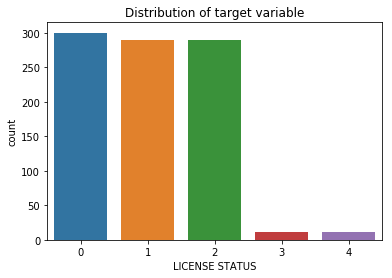

In [755]:
plt.title('Distribution of target variable')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()

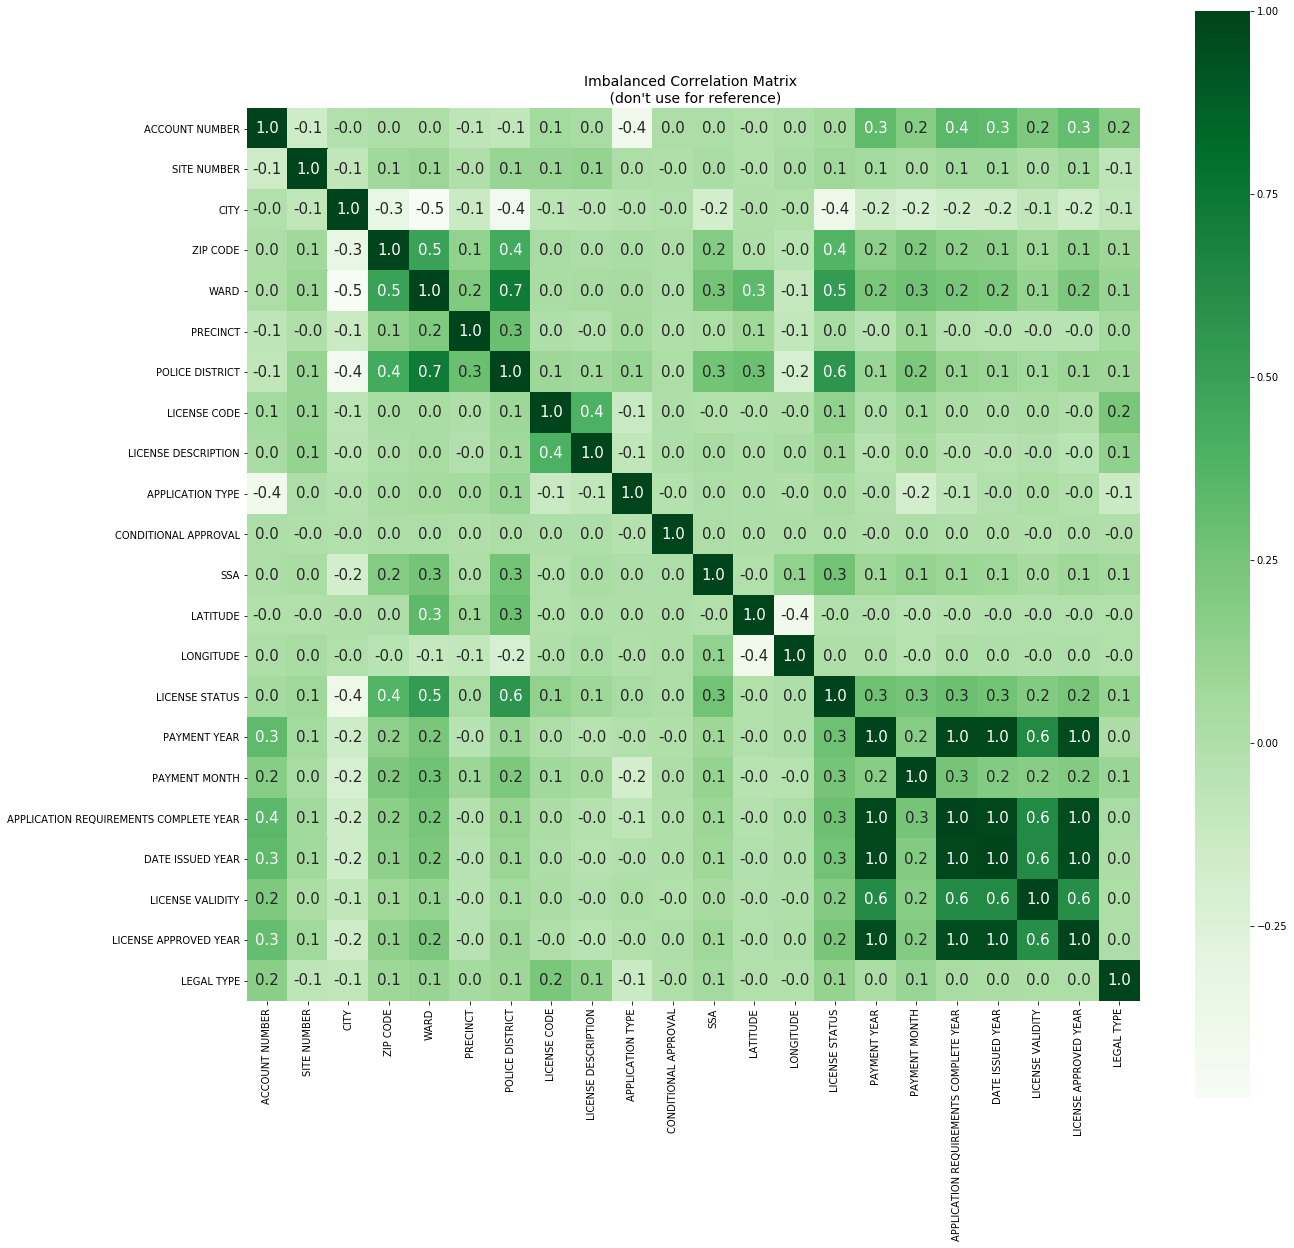

In [756]:
# Entire DataFrame
corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

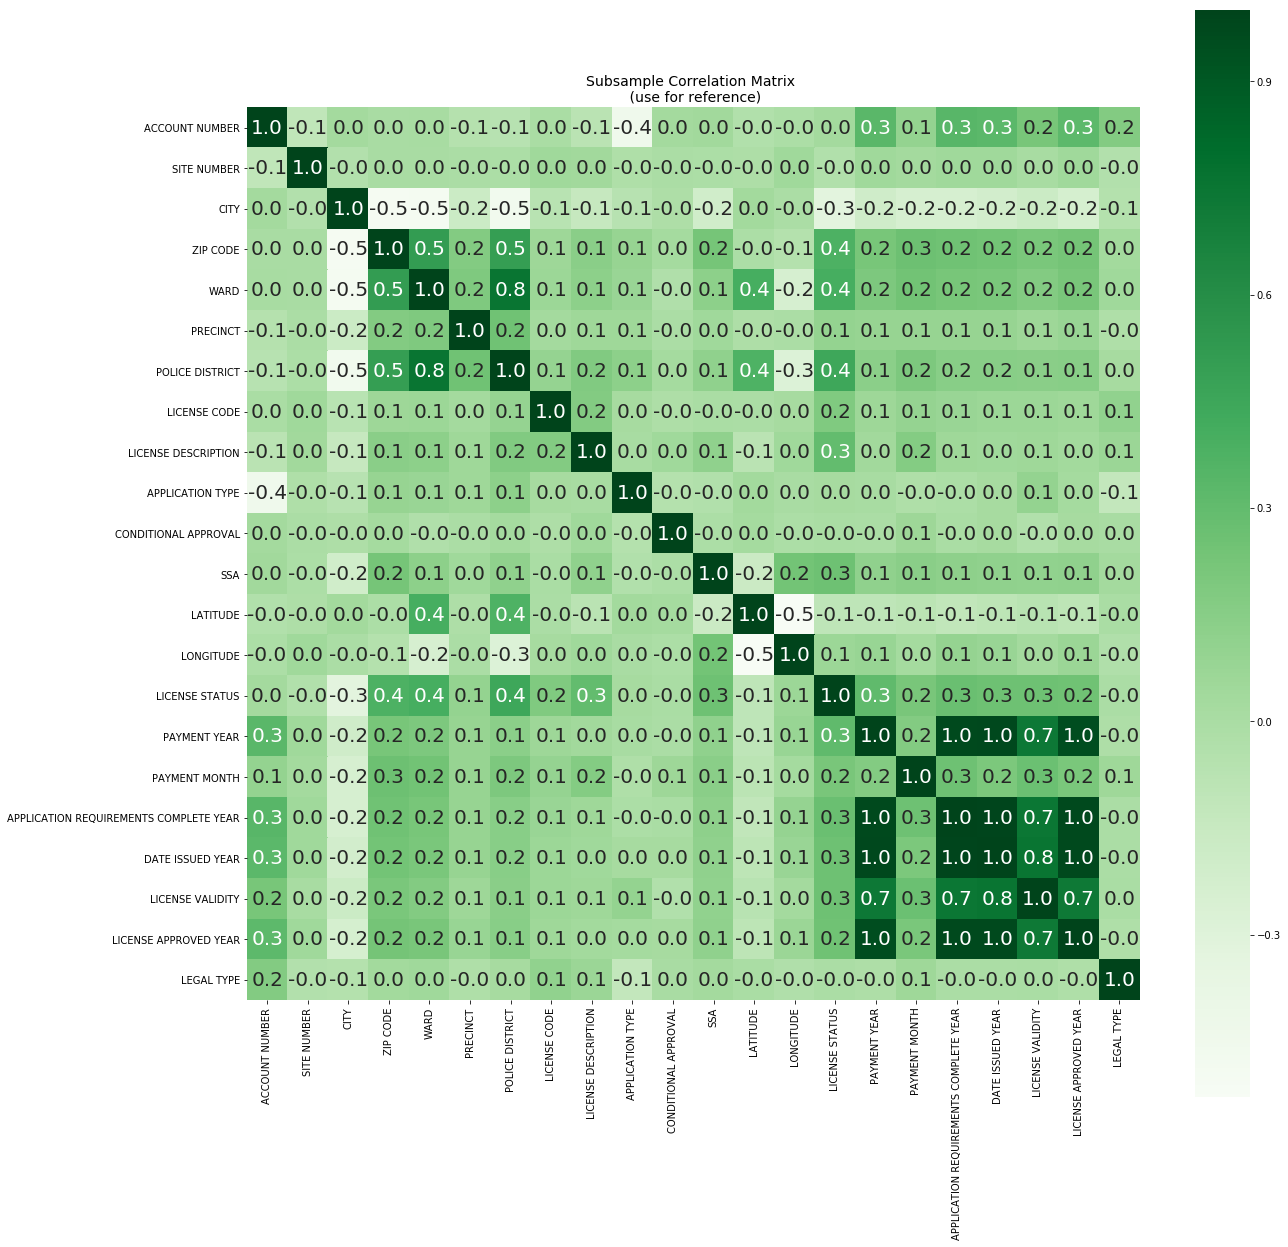

In [757]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [758]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('LICENSE STATUS', axis=1)
y = new_df['LICENSE STATUS']

In [759]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

# Decision Tree Classifier

In [763]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# # Hyperparameter Optimization
# parameters = [{'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50], 
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }
# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [764]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [765]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


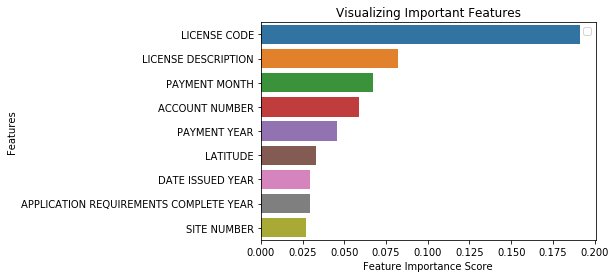

In [766]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [767]:
# Prediction on test set
y_pred = clf.predict(X_test)

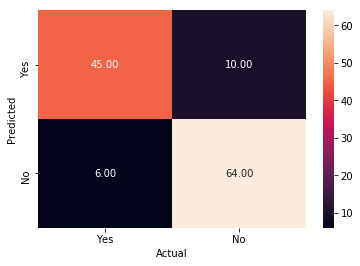

In [768]:
# Confusion matrix
draw_cm(y_test, y_pred)

In [769]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  74.78


# Random Forest Classifier

In [770]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# # Hyperparameter Optimization
# parameters = {'n_estimators': [4, 6, 9, 10, 15], 
#               'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1, 5, 8]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(rf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


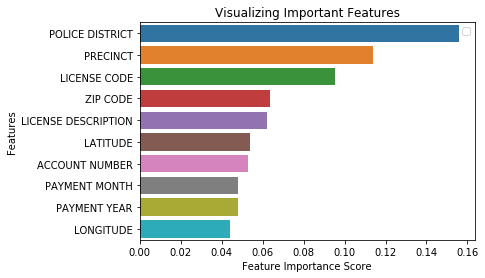

In [771]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [772]:
# Prediction on test data
y_pred = rf.predict(X_test)

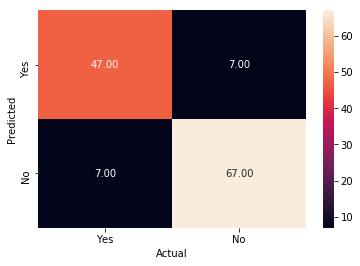

In [773]:
# Confusion metrix
draw_cm(y_test, y_pred)

In [774]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

Total Accuracy :  78.32


# XGBoost

In [775]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier

# Create a XGB Classifier
# gbm = XGBClassifier(learning_rate = 0.02, n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=1, subsample=0.8, 
#                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1)
gbm = XGBClassifier()

# Train the model using the training sets
gbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [776]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [777]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  80.97


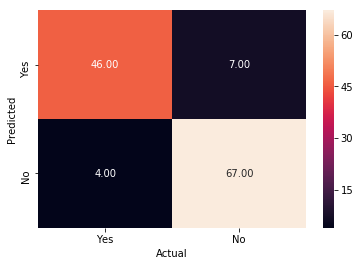

In [778]:
# Confusion matrix 
draw_cm(y_test, y_pred)

# Evaluation and comparision of all the models

In [779]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost', 'Artificial Neural Networks'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb, acc_ann]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Artificial Neural Networks,91.195763
6,XGBoost,80.970000
3,Random Forest,78.320000
2,Decision Tree,74.780000
4,Support Vector Machines,74.380000
5,K - Nearest Neighbors,73.770000
0,Logistic Regression,67.700000
1,Naive Bayes,58.640000


## Selecting XGBoost as our best model

In [780]:
train_data.shape

(85395, 22)

In [781]:
test_data.shape

(57239, 21)

In [782]:
# Predicting on the test dataset
my_pred = gbm.predict(test_data)

In [783]:
my_pred.shape

(57239,)

In [784]:
my_submission['LICENSE STATUS'] = my_pred

In [785]:
my_submission.shape

(57239, 2)

In [786]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [787]:
# Saving predictions to file
my_submission.to_csv('submission.csv', index=False)